In [3]:
import pandas as pd
import numpy as np

avatar_df = pd.read_csv('/Users/sandeepk/Downloads/avatar.csv', encoding= 'unicode_escape')

In [94]:
water_df = avatar_df[avatar_df['book'] == 'Water']
earth_df = avatar_df[avatar_df['book'] == 'Earth']
fire_df = avatar_df[avatar_df['book'] == 'Fire']

def char_list(book):
    book = book[book["character"].str.contains("and")==False]

    count = book['character'].value_counts()
    count = pd.DataFrame(count)

    char = pd.DataFrame()
    char['characters'] = list(count.index)
    char['occurance'] = list(count['character'])

    char = char.iloc[1:]
    return char

char_list(water_df)

,characters,occurance
1,Aang,818
2,Katara,636
3,Sokka,614
4,Zuko,174
5,Iroh,129
...,...,...
123,Mask dealer,1
124,Shop keeper,1
125,Puppet Fire Lord,1
126,Fire Nation kids,1


In [91]:
def chapter_ratings(book):
    chap_ratings = book.groupby('chapter').agg({'imdb_rating': 'mean'})
    chap_ratings.sort_values(by = ['imdb_rating'], ascending=False, inplace=True)
    return chap_ratings
   
chapter_ratings(earth_df)

,imdb_rating
chapter,
The Crossroads of Destiny,9.6
Zuko Alone,9.5
The Tales of Ba Sing Se,9.2
The Blind Bandit,9.2
Lake Laogai,9.1
The Guru,9.1
The Drill,9.0
The Chase,9.0
The Desert,8.8


In [131]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sandeepk/nltk_data...


True

In [133]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


df_avatar_lines = avatar_df.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

df_character_sentiment = avatar_df[avatar_df['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]
df_character_sentiment.reset_index(inplace=True, drop=True)

# calculating sentiment score
sid = SentimentIntensityAnalyzer() 
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_character_sentiment.iloc[:, :-1]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sandeepk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,character,character_words,neg,neu,pos
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000
2,Katara,"Sokka, look!",0.000,1.000,0.000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000
...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000


([<matplotlib.axis.XTick at 0x7f93b29ab220>,
 [Text(0.1, 0, 'Aang'),
  Text(1.1, 0, 'Azula'),
  Text(2.1, 0, 'Iroh'),
  Text(3.1, 0, 'Jet'),
  Text(4.1, 0, 'Katara'),
  Text(5.1, 0, 'Sokka'),
  Text(6.1, 0, 'Suki'),
  Text(7.1, 0, 'Toph'),
  Text(8.1, 0, 'Zhao'),
  Text(9.1, 0, 'Zuko')])

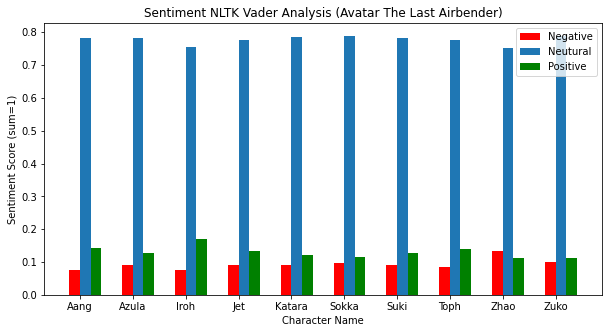

In [176]:
import matplotlib.pyplot as plt
top_sentiment = df_character_sentiment.groupby('character').agg({'neg': 'mean', 'neu' : 'mean', \
                                                'pos': 'mean'})

# Numbers of pairs of bars you want
N = 10

# Data on X-axis

# Specify the values of blue bars (height)
red_bar = top_sentiment['neg']
yellow_bar = top_sentiment['neu']
green_bar = top_sentiment['pos']


# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.2       

# Plotting
plt.bar(ind, red_bar, width, color="red", label='Negative')
plt.bar(ind + width, yellow_bar, width, label='Neutural')
plt.bar(ind + width*2, green_bar, width, color='g', label='Positive')
           
plt.xlabel('Character Name')
plt.ylabel('Sentiment Score (sum=1)')
plt.title('Sentiment NLTK Vader Analysis (Avatar The Last Airbender)')
plt.legend()           

plt.xticks(ind + width / 2, list(top_sentiment.index))
